# Amino acids: the building blocks of proteins!

All proteins are composed of amino acids, small molecules that feature a common "backbone" that can be linked together to form a longer polymer (a.k.a. a protein). All amino acids have a central carbon atom (C$_\alpha$) that is bonded to four other atoms: 
* a nitrogen atom (part of the amino group);
* a carbon atom (part of the carboxyl/carboxylic acid group);
* a hydrogen atom (H$_\alpha$); and
* a carbon atom of a side chain group (with the exception of glycine).

It is the side chain group that makes each amino acid chemically distinguishable from the others.

As you can see in the graphic below, there are 20 different common amino acids. Correspondingly, there are several possible ways of organizing the amino acids into groups (or classes). The graphic below groups the amino acids by the chemical properties of their side chains, but it's worth noting that this is a specific *choice* (made by a human!) rather than any kind of "law".

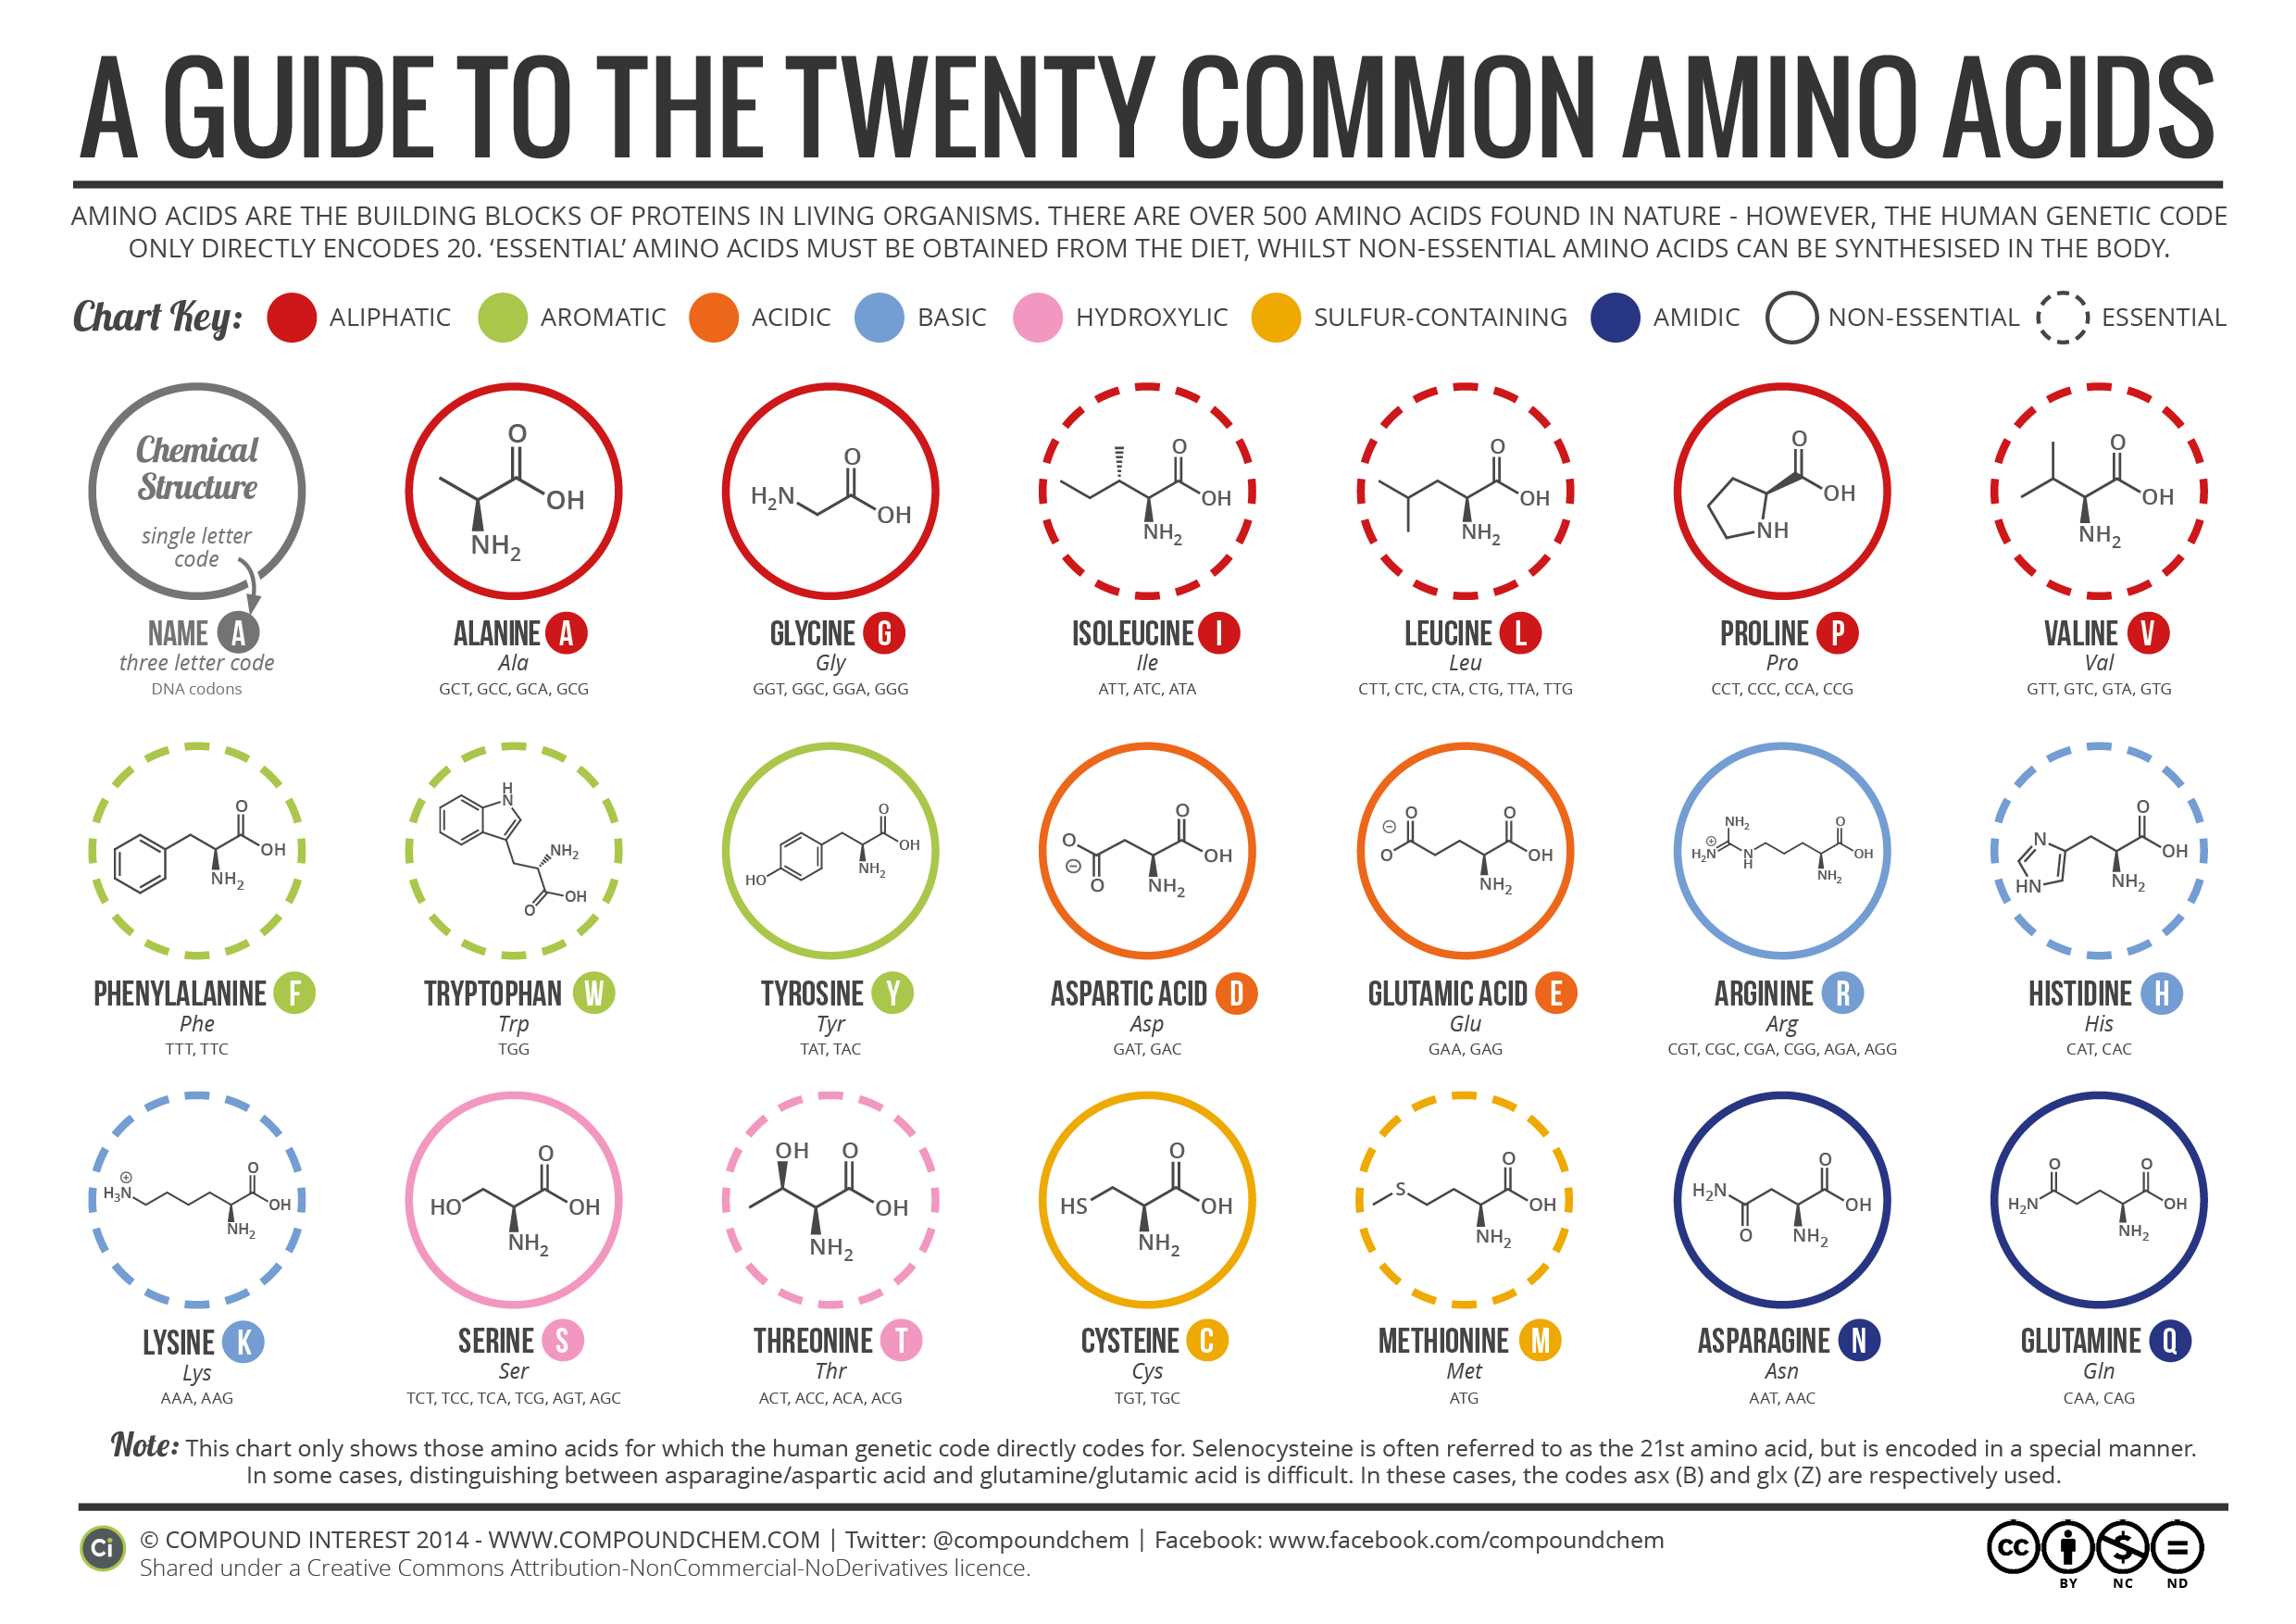

Clustering is an *unsupervised* machine learning method in which data are provided to an algorithm, and it determines on its own as to which group each data point should be assigned to. In what follows, we'll use a **clustering algorithm** to group the amino acids by two properties (or *features* in ML parlance), their molar mass (in g/mol) and their number of carbon atoms. 

The specific algorithm we'll use is called ***k*-means clustering**, and the only thing we need to do in order to obtain the group assignments is input our data and tell the algorithm how many groups we want to obtain. The algorithm then works to minimize the "distance" between each data point and its respective group center (determined by the mean of the data points assigned to that group). If you'd like to learn more about this algorithm, the Wikipedia page for it is excellent: https://en.wikipedia.org/wiki/K-means_clustering

## Reading in the data and making a plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [ ]:
aas = pd.read_csv('data/aminoacids.csv')
aas.head() # delete .head() if you want to see the full DataFrame

In [ ]:
plt.scatter(aas['numC'], aas['molmass'])
plt.xlabel('Number of carbon atoms')
plt.ylabel('Molar mass (g/mol)')
plt.title('Characteristics of amino acids')
plt.xlim(0,12)
plt.ylim(40,220)
plt.show()

## Clustering the amino acids using the *k*-means clustering algorithm

In [ ]:
from sklearn.cluster import KMeans

Before we can use the *k*-means algorithm, we need to convert the amino acid data from the pandas DataFrame into a NumPy array. Below we do this and assign the variable name `X` to the NumPy array:

In [ ]:
X = aas[['numC', 'molmass']].to_numpy()
print(X[:5]) # print first five entries of input data

Clustering the data is as simple as calling the `KMeans()` function and specifying the number of groups – or clusters – that we want to obtain. In the example below, we'll use just two clusters. We can then output the cluster assignments in a straightforward way:

In [ ]:
KMclusters = KMeans(n_clusters=2, random_state=0).fit(X)
print(KMclusters.labels_)

We can then insert these assignments back into the DataFrame to match them up with their respective amino acids:

In [ ]:
aas['cluster'] = KMclusters.labels_
aas

Finally, we can visualize the clustering results overlaid with our original scatter plot:

In [ ]:
plt.scatter(aas['numC'], aas['molmass'], c=aas['cluster'], cmap='tab10')
plt.xlabel('Number of carbon atoms')
plt.ylabel('Molar mass (g/mol)')
plt.title('Characteristics of amino acids')
plt.xlim(0,12)
plt.ylim(40,220)
plt.show()

## Scaling your data for ML algorithms

One thing you might have noticed about these data is that the ranges of the two variables are quite different. The molecular masses vary between roughly 60 and 200 g/mol, while the numbers of carbon atoms vary between 2 and 11. This difference in the ranges of the variables can present a challenge for ML algorithms, and so it is common to "scale" the data by normalizing it in some manner. For today, we'll use **min-max scaling**, which scales each variable such that its lowest value is 0 and highest value is 1. Then we'll see if it changes the results of our clustering.

Luckily, scikit-learn includes a function to perform min-max scaling. In the code that follows below, we'll store the scaled data in a new NumPy array named `X2`:

In [ ]:
# normalized data
from sklearn.preprocessing import minmax_scale
X2 = minmax_scale(X)
print(X2[:5]) # print first five entries of scaled input data

In [ ]:
KMclusters = KMeans(n_clusters=2, random_state=0).fit(X2)
aas['cluster'] = KMclusters.labels_
aas.head()

In [ ]:
plt.scatter(aas['numC'], aas['molmass'], c=aas['cluster'], cmap='tab10')
plt.xlabel('Number of carbon atoms')
plt.ylabel('Molar mass (g/mol)')
plt.title('Characteristics of amino acids')
plt.xlim(0,12)
plt.ylim(40,220)
plt.show()

Besides the fact that the colors seem to have "switched places" here, it's clear that the cluster assignments are also different once we've normalized the data. Do these assignments make more sense than the ones generated using unnormalized data? How might we argue this (or the opposite)?

## Your turn #1: try different numbers of clusters

Modify the code directly above to use different numbers of clusters. What is the minimum number of clusters necessary so that all three "aromatic" amino acids (see diagram at the top) are in a cluster by themselves? What is the maximum number of clusters possible before these amino acids become split between more than one cluster?

## Your turn #2: use a different clustering method

One possible criticism of *k*-means clustering is that it still relies on a human user to choose the number of clusters. What if there were an algorithm that made this decision on its own (i.e., truly unsupervised clustering)? We're in luck because there is just such an algorithm included within scikit-learn. Take a look at the documentation for the `AffinityPropagation()` included within `sklearn.cluster`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html

Cluster the normalized amino acid data (`X2`) using the affinity propagation algorithm, remembering to include `random_state=0` for reproducibility. Visualize your results and answer the following:

1. How many clusters does this algorithm decide to use? 
2. If you force *k*-means clustering to use this number of clusters, do the clusters contain the same amino acids?

In [ ]:
from sklearn.cluster import AffinityPropagation

## write code here to cluster the data X2 using the ##
## affinity propagation algorithm ##
## then add the cluster assignments as a column to aas ##

In [ ]:
## write code here to visualize the cluster assignments ##
## using a scatter plot (as above) ##

## Your turn #3 (more advanced): clustering using more/different features

So far we have limited our clustering to be based on just two features: molar mass and number of carbon atoms. From our scatter plot we can see that these two features are highly correlated and therefore are somewhat redundant in terms of describing these molecules. We might find that other groupings are possible if we include other information about these molecules, such as their net charge (possibilities: -1, 0, 1), number of nitrogen/oxygen/sulfur atoms, and so on.

1. Add another feature of your choice to the `aas` DataFrame (e.g., `aas['newfeature'] = [ ... data here ... ]`). 
2. Construct a new set of input data `X` that includes this feature.
3. Normalize `X` using min-max scaling to generate `X2`. 
4. Cluster the data using the affinity propagation algorithm.
5. Visualize the results of your clustering using the same two features as before. (Visualizing this with more than two features can be tricky! Why?)

In [ ]:
## your code goes here ##